#  Import 

## Library

In [1]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#train test split
from sklearn.model_selection import train_test_split

# For scaler dataset
from sklearn.preprocessing import StandardScaler

# import Logistic Regression clasificator
from sklearn.linear_model import LogisticRegression

# Roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# GridSearchCV
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

## dataset

In [2]:
iris = pd.read_csv('iris.data',names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploration

## Look Nans

In [3]:
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [33]:
import missingno as msno
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Pairplot

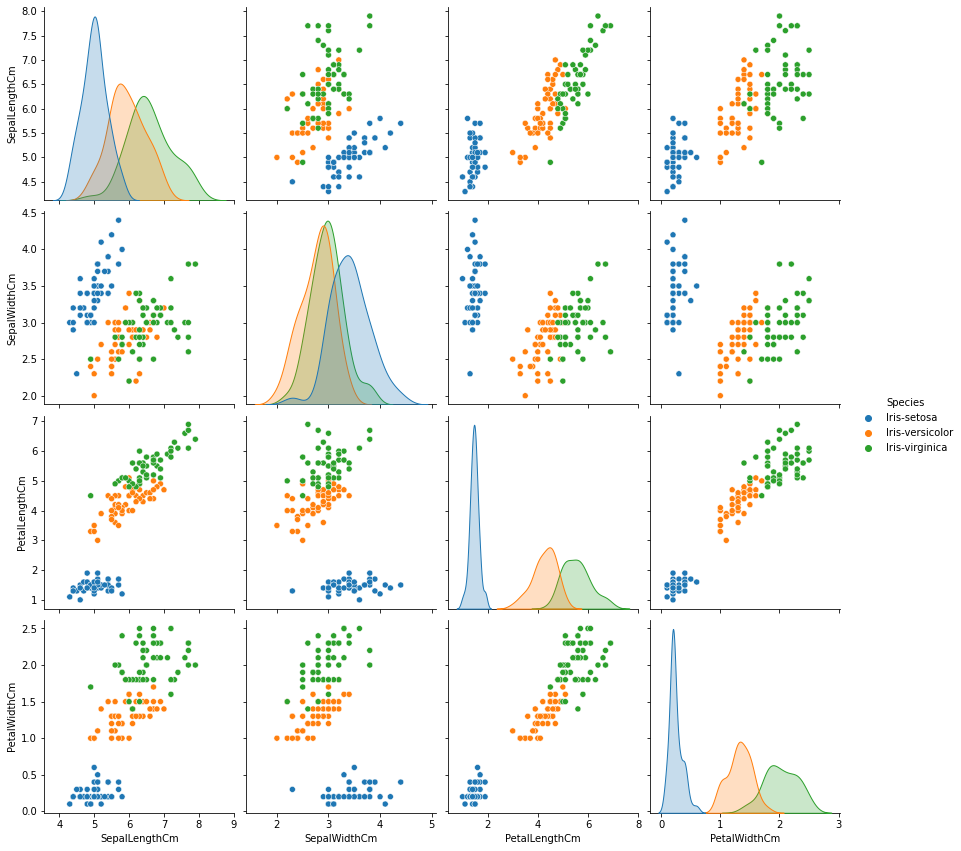

In [4]:
sns.pairplot(data=iris, hue='Species',size=3,diag_kind="kde")
plt.show()

## boxplot

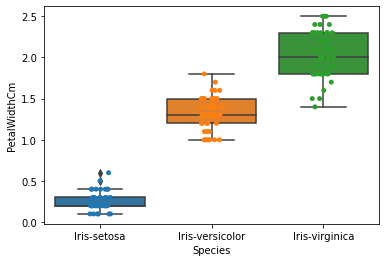

In [5]:
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="gray")

In [6]:
# iris.columns.values

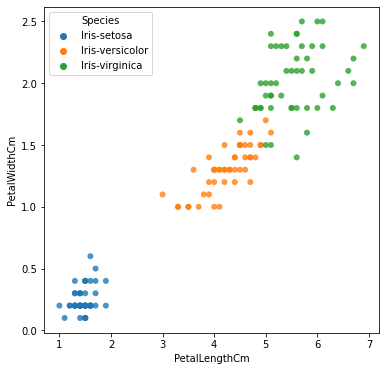

In [7]:
# Un scatter plot para visualizar dos variables
fig, (ax0) = plt.subplots(1,1,figsize=(6,6))
g=sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", data=iris, hue = 'Species', 
                  linewidth=0, alpha = 0.8,ax=ax0)
plt.show()

## Correlation Matrix

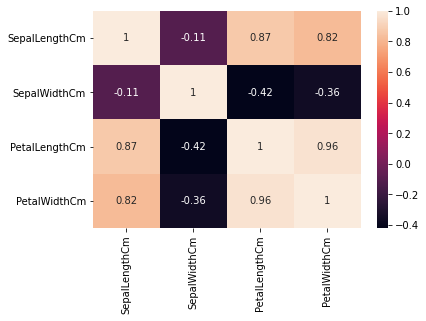

In [8]:
sns.heatmap( iris.corr(),annot=True )
plt.show()

# Denife X e Y

## Define X

In [9]:
x = iris.loc[ : ,['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


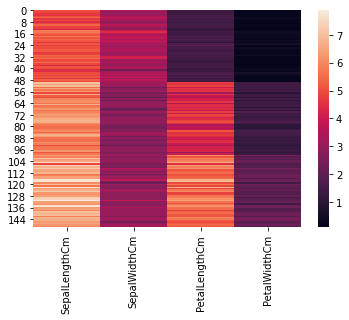

In [10]:
sns.heatmap(x)
plt.show()

## Define Y

In [11]:
y = iris.loc[ : ,['Species']]
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


# Train & Test

## Transform Y from str to binary 

In [12]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Split Train & Test

In [13]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)

In [14]:
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test  : {x_test.shape}')
print(f'y_train : {y_test.shape}')

x_train : (105, 4)
y_train : (105,)
x_test  : (45, 4)
y_train : (45,)


In [15]:
type(x_train)

pandas.core.frame.DataFrame

## heatmap x_train

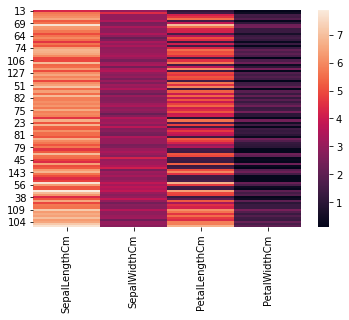

In [16]:
sns.heatmap(x_train)
plt.show()

## Scaler x_train

In [17]:
# Scaler gather mu and sigma of columns
# [StandardScaler() ] is the scalator
# [fit] Compute the mean and std to be used for later scaling
scaler = preprocessing.StandardScaler().fit( x_train )

In [18]:
print(scaler.mean_)
print(scaler.var_)

[5.88       3.04666667 3.9        1.27142857]
[0.63569524 0.17372698 2.78628571 0.53632653]


## Transform x_train

In [19]:
x_train_scal = scaler.fit_transform(x_train)

## Transform x_test

In [20]:
x_test_scal = scaler.fit_transform(x_test)

## heatmap 

Text(0.5, 1.0, 'x_test_scal')

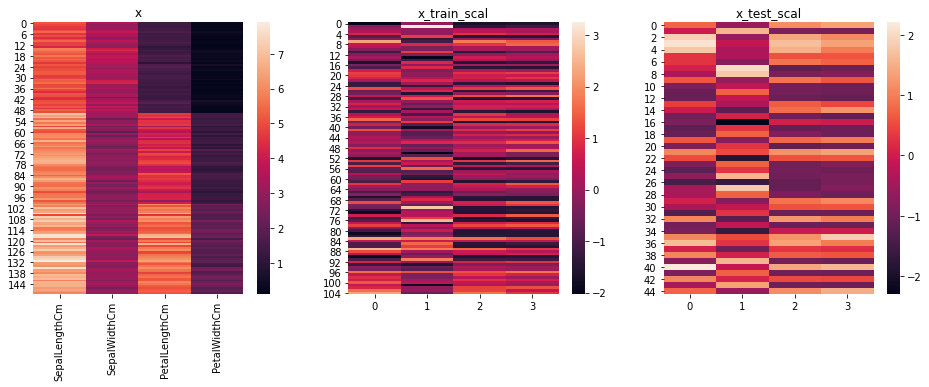

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(x_train_scal, ax = axs[1])
sns.heatmap(x_test_scal, ax = axs[2])
axs[0].set_title('x')
axs[1].set_title('x_train_scal')
axs[2].set_title('x_test_scal')

# Logistic Regression 

## Define Logistic Regression Model

In [22]:
log_reg = LogisticRegression(random_state=4, solver='lbfgs')

In [23]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1,2,3,4,5,6,7,8,9, 10,11,12,13,14, 100, 1000]}]



grid_search = GridSearchCV(estimator = log_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train_scal, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=4),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                100, 1000]}],
             scoring='accuracy')

In [24]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9714


Parameters that give the best results : 

 {'C': 3}


Estimator that was chosen by the search : 

 LogisticRegression(C=3, random_state=4)


## Define Hyperparameters

In [25]:
parameters = {'C':[1, 10, 100, 1000]}

## Grid Search Cross Validation

In [26]:
clf_lr = GridSearchCV( log_reg, param_grid = parameters, refit = True, cv = 5)

## Training

In [27]:
log_reg.fit(x_train_scal, y_train)

LogisticRegression(random_state=4)

# Performance Metric

## Predict the test dataset:

In [28]:
print('Logistic Regression Model Accuracy : {:.2f}'.format(log_reg.score(x_test_scal,y_test)))

Logistic Regression Model Accuracy : 0.87


## Roc Curve

In [29]:
# #compute and plot AUC
# yproba = log_reg.predict_proba(x_test_scal)
# fpr1, tpr1, thresholds = roc_curve(y_test.astype('int'), yproba[:,1], drop_intermediate = False)
# auc = metrics.auc(fpr1, tpr1)
# print("El AUC es = " + str(auc))

In [30]:
# logit_roc_auc = roc_auc_score( y_test,log_reg.predict(x_test_scal))
# fpr,tpr, threshholds = roc_curve(y_test, log_reg.predict_proba(x_test_scal)[:,1])
# plt.figure()
# plt.plt(fpr, tpr, label = 'Logistic Regression(area = %0.2f)' % logit_roc_auc)
# plt.plt([0,1],[0,1],'r--')
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legent(loc='lower right')
# plt.savefig('log_ROC')
# plt.show()

In [31]:
# plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
# plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid(False)
# plt.legend(loc="lower right")
# plt.title('ROC curve with KNN')
# plt.show()

## 